In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from numpy import array

2022-10-17 16:14:50.463498: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-17 16:14:50.463605: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Replace missing values with Zero and Group by month

<AxesSubplot:xlabel='date'>

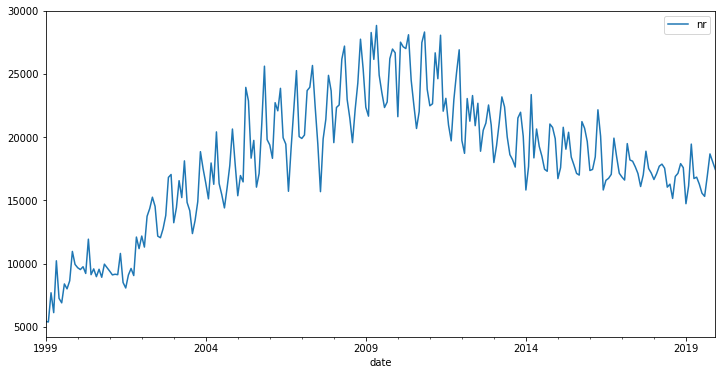

In [2]:
df= pd.read_csv('colheitas.csv', parse_dates=['date'])
df['nr'].fillna(value=0, inplace=True)
df=df.groupby('date').sum()
df=df.resample(rule='MS').sum()
dataset = df.values
dataset = df.astype('float32')
df.plot(figsize=(12,6))

### Normalize Data Set and Split Train and Test

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [4]:
train=dataset[:240]
test=dataset[240:] 

### Create batches of training data (12 months)

In [5]:
def split_sequence(sequence, n_steps_in, n_steps_out, slide):
    X, y = list(), list()
    for i in range(0, len(sequence), slide):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [6]:
raw_seq = train
n_steps_in, n_steps_out, slide = 24,12,1
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out, slide)

### Define and fit LSTM model 

In [7]:
callback = EarlyStopping(monitor='loss', patience=50)
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(n_steps_in, 1)))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=1000, callbacks=[callback])

Epoch 1/1000


2022-09-20 14:27:25.571311: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-20 14:27:25.571340: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-20 14:27:25.571361: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-09-20 14:27:25.571577: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


7/7 [==============================] - 1s 17ms/step - loss: 0.3857
Epoch 2/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.3434
Epoch 3/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.2977
Epoch 4/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.2312
Epoch 5/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.1220
Epoch 6/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0860
Epoch 7/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0634
Epoch 8/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0316
Epoch 9/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0220
Epoch 10/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0190
Epoch 11/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0169
Epoch 12/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0157
Epoch 13/1000
7/7 [==============================]

7/7 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 203/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 204/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 205/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0093
Epoch 206/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0093
Epoch 207/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 208/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 209/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 210/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0091
Epoch 211/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 212/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0091
Epoch 213/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 214/1000
7/7 [===========

7/7 [==============================] - 0s 12ms/step - loss: 0.0084
Epoch 303/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0085
Epoch 304/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0084
Epoch 305/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0084
Epoch 306/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0083
Epoch 307/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0082
Epoch 308/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0083
Epoch 309/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0083
Epoch 310/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0082
Epoch 311/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0082
Epoch 312/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0082
Epoch 313/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0083
Epoch 314/1000
7/7 [===========

7/7 [==============================] - 0s 11ms/step - loss: 0.0073
Epoch 403/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0074
Epoch 404/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 405/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 406/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 407/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 408/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 409/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0071
Epoch 410/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 411/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 412/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0071
Epoch 413/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0073
Epoch 414/1000
7/7 [===========

7/7 [==============================] - 0s 11ms/step - loss: 0.0064
Epoch 503/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0065
Epoch 504/1000
7/7 [==============================] - 0s 18ms/step - loss: 0.0066
Epoch 505/1000
7/7 [==============================] - 0s 16ms/step - loss: 0.0065
Epoch 506/1000
7/7 [==============================] - 0s 17ms/step - loss: 0.0064
Epoch 507/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.0064
Epoch 508/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 509/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0063
Epoch 510/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0064
Epoch 511/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0064
Epoch 512/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.0063
Epoch 513/1000
7/7 [==============================] - 0s 16ms/step - loss: 0.0063
Epoch 514/1000
7/7 [===========

7/7 [==============================] - 0s 16ms/step - loss: 0.0052
Epoch 702/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 703/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 704/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 705/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0053
Epoch 706/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0054
Epoch 707/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0054
Epoch 708/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.0056
Epoch 709/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 710/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0051
Epoch 711/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 712/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 713/1000
7/7 [===========

7/7 [==============================] - 0s 11ms/step - loss: 0.0050
Epoch 802/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0050
Epoch 803/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0050
Epoch 804/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0050
Epoch 805/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 806/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 807/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 808/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 809/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 810/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0050
Epoch 811/1000
7/7 [==============================] - 0s 16ms/step - loss: 0.0050
Epoch 812/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.0051
Epoch 813/1000
7/7 [===========

7/7 [==============================] - 0s 15ms/step - loss: 0.0046
Epoch 902/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0047
Epoch 903/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.0047
Epoch 904/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0046
Epoch 905/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0046
Epoch 906/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0046
Epoch 907/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0046
Epoch 908/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0046
Epoch 909/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0046
Epoch 910/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0046
Epoch 911/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0047
Epoch 912/1000
7/7 [==============================] - 0s 18ms/step - loss: 0.0046
Epoch 913/1000
7/7 [===========

### Plot losses per epoch

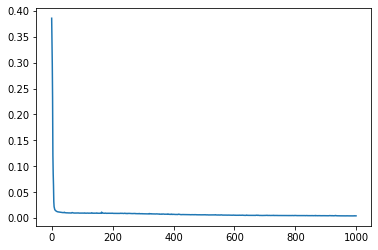

In [8]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### Test Predicitions

In [9]:
last_train_batch = train[-n_steps_in:]
last_train_batch = last_train_batch.reshape((1, n_steps_in, 1))
test_predictions = model.predict(last_train_batch)

In [10]:
true_predictions = scaler.inverse_transform(test_predictions)
prediction = true_predictions.tolist()[0] 

### Calculate Error

In [11]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [12]:
np.sqrt(mean_squared_error(df[240:]['nr'], prediction)), mean_absolute_error(df[240:]['nr'], prediction), MAPE(df[240:]['nr'], prediction)

(942.7818714613837, 616.7987467447916, 3.5612175691224435)

In [13]:
index_of_fc = pd.date_range(df[240:].index[0], periods = 12, freq='MS')
collection_pred_lstm = pd.Series(array(prediction), index=index_of_fc)
%store collection_pred_lstm

Stored 'collection_pred_lstm' (Series)


### Plot

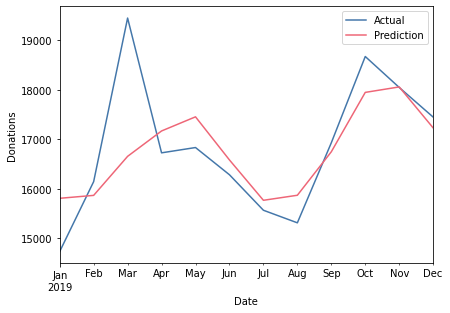

In [15]:
cm = 1/2.54 
df[240:]['nr'].plot(legend=True, color=['#4477AA'])
pd.DataFrame(prediction, index=df[240:]['nr'].index.values, columns=['nr'])['nr'].plot(figsize=(17*cm,12*cm), color=['#EE6677'])
plt.legend(['Actual', 'Prediction'],loc='upper right')
plt.ylabel('Donations')
plt.xlabel('Date')